In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
from time import strptime

In [265]:
from datetime import datetime, timedelta

In [246]:
import re

In [94]:
# matplotlib figures styling
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('fivethirtyeight')

In [109]:
df1=pd.read_csv('parts_cleaned.csv')

df2=pd.read_csv('parts_basic_data_cleaned.csv')

C:\Users\Brian\AppData\Local\Temp\ipykernel_4916\1660184064.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('parts_cleaned.csv')


In [110]:
df1.drop_duplicates(subset=['id'], inplace=True)
df2.drop_duplicates(subset=['id'], inplace=True)

In [111]:
df2.drop(['Unnamed: 0','region_name', 'title', 'url', 'Condition', 'images_count','user_id'], inplace=True, axis=1)


In [112]:
# duplicate = df1[df1['id'].duplicated()]
# duplicate

In [113]:
# df2.head()

In [114]:
print(df1.shape)
print(df2.shape)

(11351, 43)
(11204, 7)


In [115]:
# df1.drop('Unnamed: 0', axis=1, inplace=True)
# df2.drop('Unnamed: 0', axis=1, inplace=True)

In [116]:
df=pd.merge(df1, df2, on='id')

In [117]:
df.shape

(11105, 49)

In [118]:
# ls1=df1.columns
# ls2=df2.columns
# ls3=[]
# for item in ls1:
#     for item2 in ls2:
#         if(item==item2):
#             ls3.append(item)        
    
# print(ls3)

In [119]:
# ls1=df1.columns
# ls2=df2.columns
# set1=set(ls1)
# set2=set(ls2)
# print(set1 & set2)


In [120]:
# df1.columns

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11105 entries, 0 to 11104
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               11105 non-null  int64  
 1   count_images             11103 non-null  float64
 2   count_views              11105 non-null  int64  
 3   date_created_x           11105 non-null  object 
 4   date_edited              8410 non-null   object 
 5   date_moderated           11105 non-null  object 
 6   description              11105 non-null  object 
 7   id                       11105 non-null  int64  
 8   price_history            11105 non-null  bool   
 9   region_name              11105 non-null  object 
 10  region_text              11105 non-null  object 
 11  title                    11105 non-null  object 
 12  url                      11105 non-null  object 
 13  Condition                10677 non-null  object 
 14  Type                  

In [122]:
df.head(5)

,Unnamed: 0,count_images,count_views,date_created_x,date_edited,date_moderated,description,id,price_history,region_name,region_text,title,url,Condition,Type,Make,Subtype,Interior Accessories,Exterior Accessories,Headlights and Lighting,Audio Parts,Suptype,Wheels and Parts,Safety and Security,Engine and Drivetrain,Oils and Fluids,Car Care,Watercraft and Boats,Motorcycle Parts,is_closed,value,advert_id,advert_price,adverts_count,chat_on,date_created_y,feedback_count,seller_id,last_seen,seller_name,seller_phone,status,user_response_time,guid,is_boost,region_parent_name,user_phone,short_description,Price
0,0,1.0,34,"Thu, 30 Jun 2022 07:38:02 GMT",NaN,"Thu, 30 Jun 2022 07:56:49 GMT",Good quality for use,10502792,False,Nairobi Central,"Nairobi, Nairobi Central",Car Wash Machine on Offer,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,26500,10502792,26500,3923,True,10m,0,3696862,5 hours,Tabitha enterprises,NaN,active,Typically replies within a few hours,iOR7sR6b4zs4TyEgbQAFfasQ,diamond,Nairobi,790689845,Good quality for use,26500
1,1,2.0,138,"Fri, 08 Jul 2022 07:12:58 GMT",NaN,"Fri, 08 Jul 2022 07:53:28 GMT",ABRO radiator coolant red 4 litres,10598516,False,Nairobi Central,"Nairobi, Nairobi Central",Radiator Coolant ABRO Red 4L,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Oils & Fluids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1000,10598516,1000,150,True,1y 2m,2,3463452,3 hours,Genesil Autobrake & Accessories Ltd,NaN,active,Typically replies within a few hours,ilK0bnwLY6LEdvlq5VpAizT0,vip+,Nairobi,722795527,ABRO radiator coolant red 4 litres,1000
2,2,1.0,20,"Tue, 18 Jan 2022 10:22:08 GMT",NaN,"Tue, 18 Jan 2022 16:26:02 GMT",Air Filter - Audi (4G0-133-843-L),8586019,False,Industrial Area Nairobi,"Nairobi, Industrial Area Nairobi",Air Filter - Audi (4g0-133-843-L),https://jiji.co.ke/viwandani-makadara/car-part...,Brand New,Engine & Drivetrain,Audi,Air Filters & Intake Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2000,8586019,2000,184,True,1y 10m,28,2786121,5 hours,VIPPS AUTO PARTS,NaN,active,Typically replies within a few hours,9Y2tYL7EjD7zyf4PxT7xfoYd,vip,Nairobi,741139980,Air Filter - Audi (4G0-133-843-L),2000
3,3,1.0,49,"Fri, 14 Jan 2022 14:39:24 GMT","Mon, 13 Jun 2022 06:26:53 GMT","Mon, 13 Jun 2022 06:26:53 GMT",Archive: Imported and genuine ex Japan auto pa...,8544009,False,Ngara,"Nairobi, Ngara",Archive: Stearings for Small Cars.,https://jiji.co.ke/ngara/car-parts-and-accesso...,Used,Other,Other Make,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6000,8544009,6000,3,True,2y 3m,10,2416590,4 hours,AIRBAG WORLD AUTO SPARES,NaN,active,Typically replies within a day,7CK7s2jNdsc7vwJrQpg0WSrq,vip_gold,Nairobi,715118289,Imported and genuine ex Japan auto parts.,6000
4,4,1.0,29,"Mon, 18 Jul 2022 11:45:17 GMT",NaN,"Mon, 18 Jul 2022 12:11:00 GMT",Archive: Livguard Din100.12v/100ah spill proof...,10691542,False,Nairobi Central,"Nairobi, Nairobi Central",Archive: Livguard Din 100.12/100ah Maintenance...,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Interior Accessories,Other Make,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,10500,10691542,10500,114,True,2y 7m,0,2189462,4 hours,Tere Electronics,NaN,active,Typically replies within a few hours,u9NQUYQ7noTtabPoYI4cgEhj,premium,Nairobi,722884731,Livguard Din100.12v/100ah spill proof sealed m...,10500


In [123]:
df.shape

(11105, 49)

In [124]:
pd.set_option('display.max_columns', 50)

In [125]:
df.loc[:,['value', 'advert_price']]

,value,advert_price
0,26500,26500
1,1000,1000
2,2000,2000
3,6000,6000
4,10500,10500
...,...,...
11100,38000,38000
11101,2600,2600
11102,4900,4900
11103,14999,14999


In [126]:
df.columns

Index(['Unnamed: 0', 'count_images', 'count_views', 'date_created_x',
       'date_edited', 'date_moderated', 'description', 'id', 'price_history',
       'region_name', 'region_text', 'title', 'url', 'Condition', 'Type',
       'Make', 'Subtype', 'Interior Accessories', 'Exterior Accessories',
       'Headlights and Lighting', 'Audio Parts', 'Suptype', 'Wheels and Parts',
       'Safety and Security', 'Engine and Drivetrain', 'Oils and Fluids',
       'Car Care', 'Watercraft and Boats', 'Motorcycle Parts', 'is_closed',
       'value', 'advert_id', 'advert_price', 'adverts_count', 'chat_on',
       'date_created_y', 'feedback_count', 'seller_id', 'last_seen',
       'seller_name', 'seller_phone', 'status', 'user_response_time', 'guid',
       'is_boost', 'region_parent_name', 'user_phone', 'short_description',
       'Price'],
      dtype='object')

In [127]:
df.drop(['Unnamed: 0','value'], inplace=True, axis=1)

# Basic EDA - Exploring numerical variables with histograms

In [128]:
df.describe()

,count_images,count_views,id,advert_id,advert_price,adverts_count,feedback_count,seller_id,seller_phone,user_phone,Price
count,11103.000000,11105.000000,1.110500e+04,1.110500e+04,11105.000000,11105.000000,11105.000000,1.110500e+04,0.0,1.110500e+04,11105.000000
mean,1.540394,36.888519,7.682194e+06,7.682194e+06,19273.940117,1616.544349,14.346871,2.080914e+06,NaN,7.075003e+08,19261.337686
std,1.397350,45.486163,2.798875e+06,2.798875e+06,33020.918558,2044.466667,24.149946,9.748541e+05,NaN,1.239696e+08,32983.019918
min,1.000000,1.000000,1.394410e+05,1.394410e+05,150.000000,0.000000,0.000000,1.602900e+04,NaN,1.009612e+08,150.000000
25%,1.000000,10.000000,5.829405e+06,5.829405e+06,3999.000000,208.000000,1.000000,1.917252e+06,NaN,7.077982e+08,3999.000000
50%,1.000000,27.000000,8.713317e+06,8.713317e+06,10000.000000,932.000000,6.000000,2.070961e+06,NaN,7.205292e+08,10000.000000
75%,1.000000,47.000000,1.010074e+07,1.010074e+07,20500.000000,2000.000000,15.000000,2.583510e+06,NaN,7.407371e+08,20300.000000
max,22.000000,1334.000000,1.084467e+07,1.084467e+07,850000.000000,24469.000000,265.000000,4.441155e+06,NaN,7.994170e+08,850000.000000


In [129]:
# Function to create histograms for numerical values of interest
ls_numerical = ['count_images','count_views', 'advert_price', 'feedback_count']

In [130]:
def plot_hist(column_name, log_scale, quantile):
    max=df[column_name].quantile(quantile)
    filt = df[column_name]<max
    x = df.loc[filt][column_name]

    plt.title(f'Distribution for {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Number of Items')

    #Add the median & mean lines
    median_price = x.median()
    mean_price = x.mean()
    plt.axvline(median_price, color='black', label= 'Median')
    plt.axvline(mean_price, color='red', label= 'Mean')

    #Plot the hist
    plt.legend()

    plt.hist(x, bins=20, log=log_scale, edgecolor='white')
    plt.show()
    

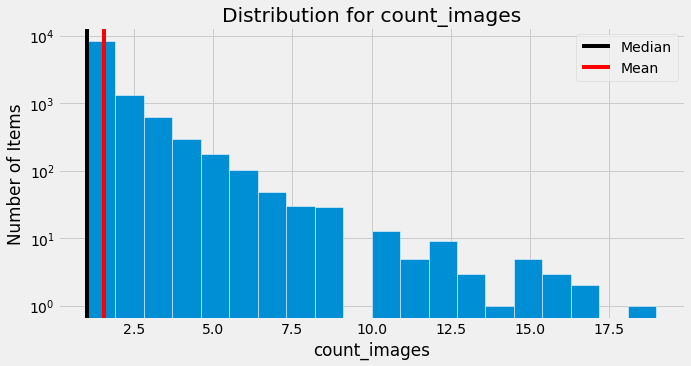

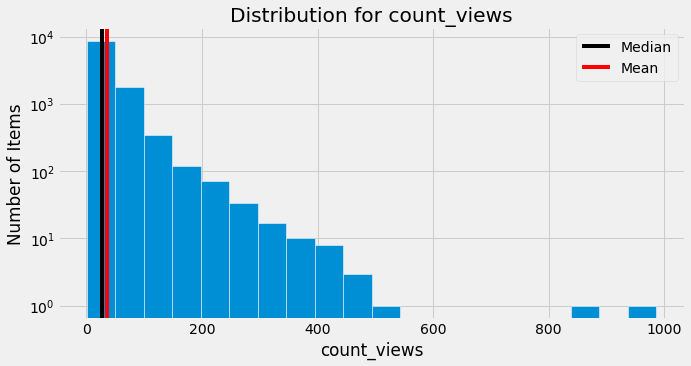

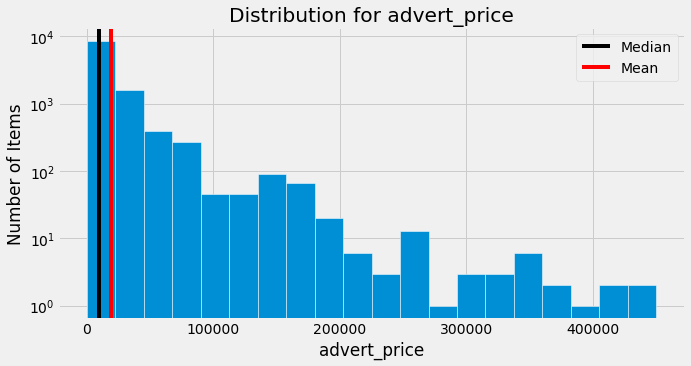

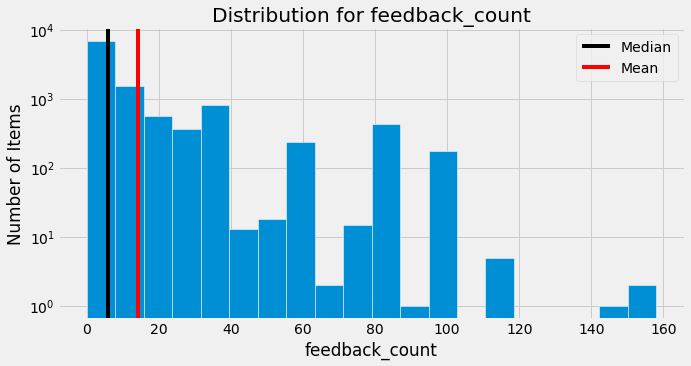

In [131]:
ls_numerical = ['count_images','count_views', 'advert_price', 'feedback_count']
for item in ls_numerical:
    plot_hist(item, True, 0.9999)
    

# Explore categorical variabls with bar plots

In [132]:
# Create a function that does bar plots for different categorical varaibles based on value_counts

In [133]:
def plot_bars(column_name, log_scale):
    # Step 1 Create a df based on the categorical variable
    df_data= df[column_name].value_counts().rename_axis(column_name).to_frame('counts').reset_index()
    df_data

    # step 2: get the variables to do the plots:
    x=df_data[column_name][:20]
    y=df_data['counts'][:20]
    total = df_data['counts'].sum()

    #step3 add details to the plots:
    plt.title(f'{column_name} (Total: {total})')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    
    if (log_scale):
        plt.yscale('log')

    plt.bar(x,y)
    plt.show()
    

In [134]:
# plot_bars('Wheels and Parts', False)

In [135]:
# df.info()

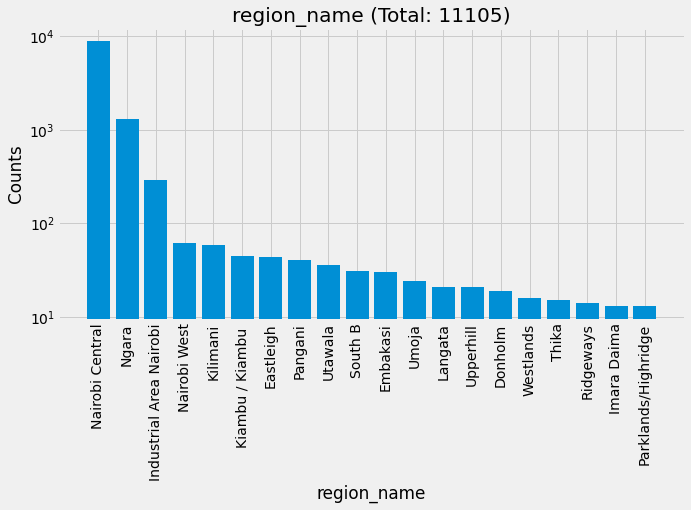

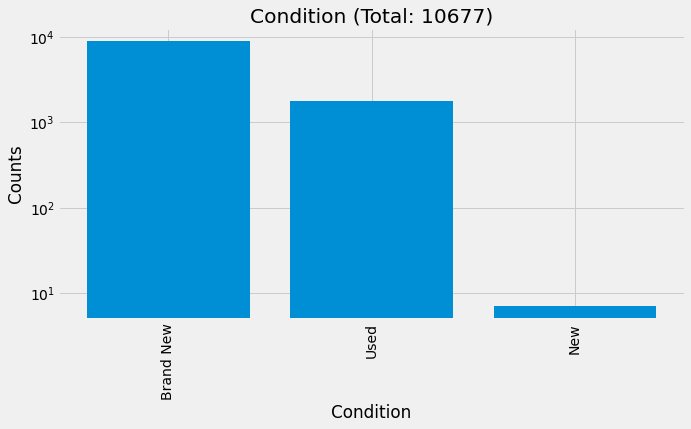

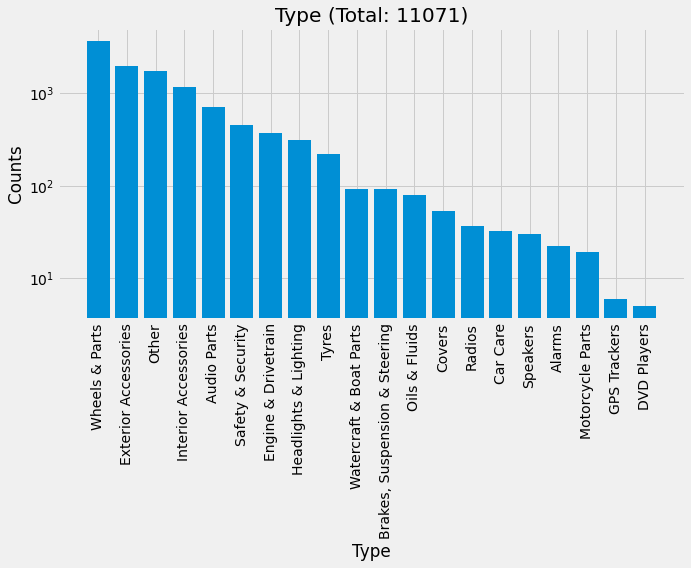

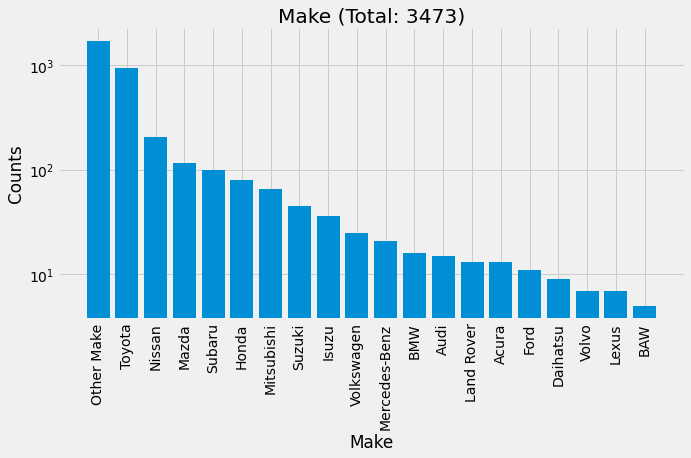

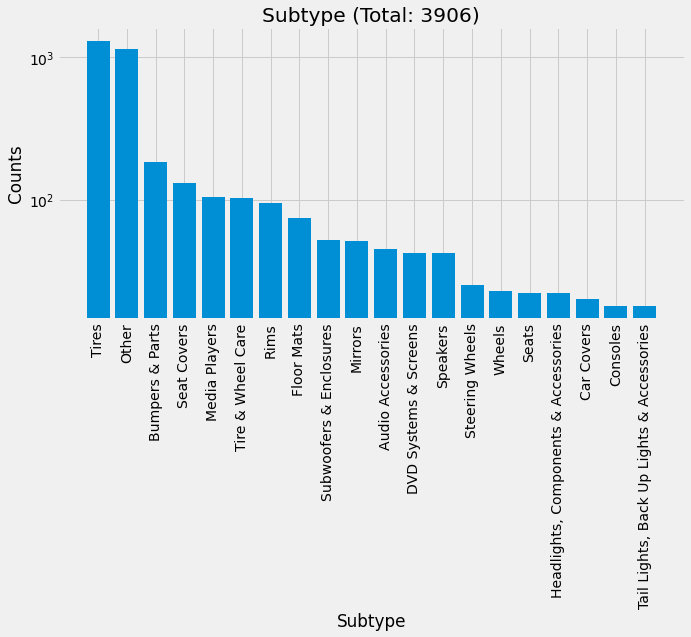

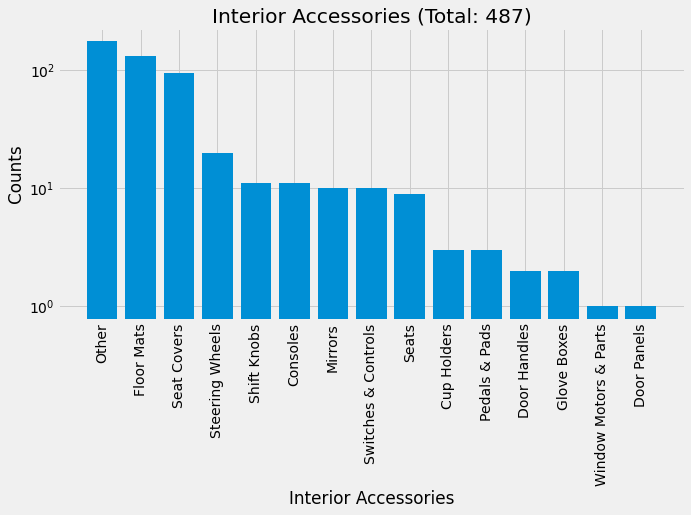

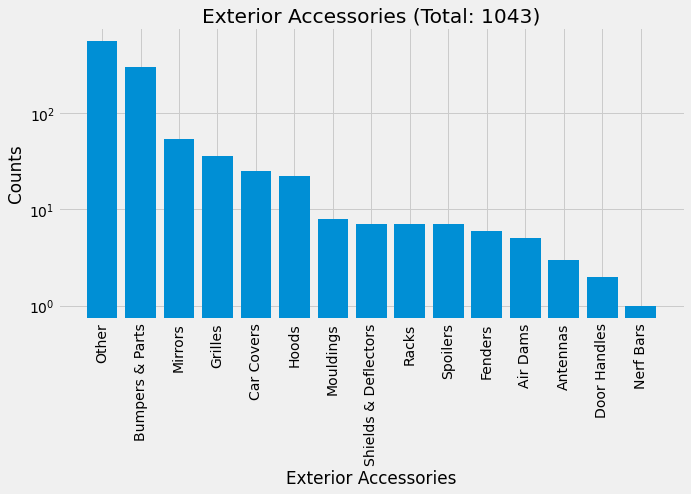

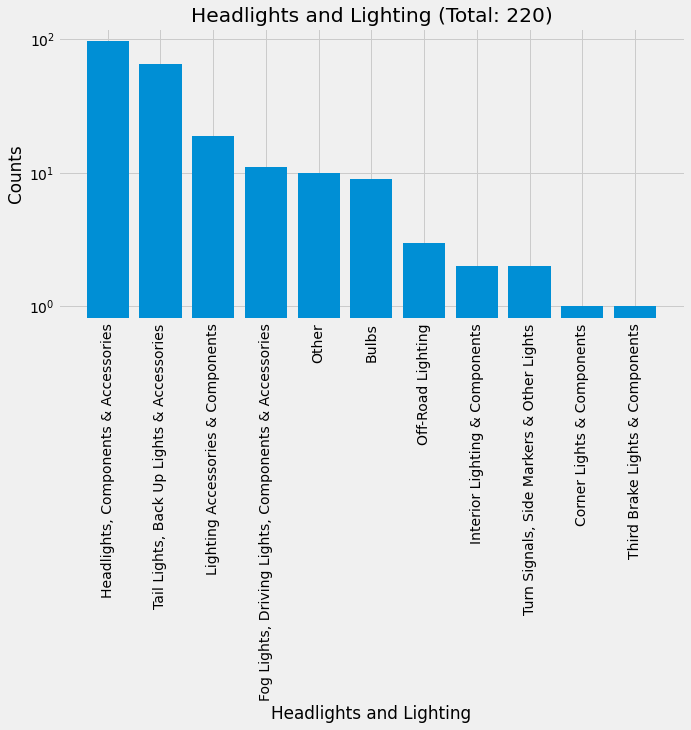

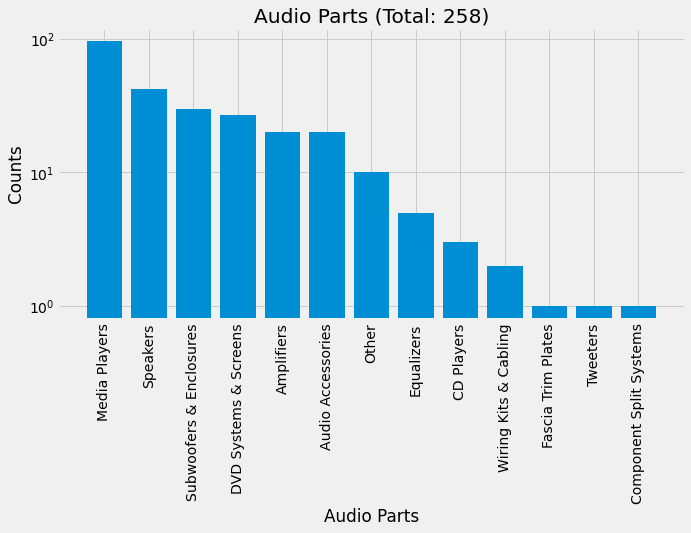

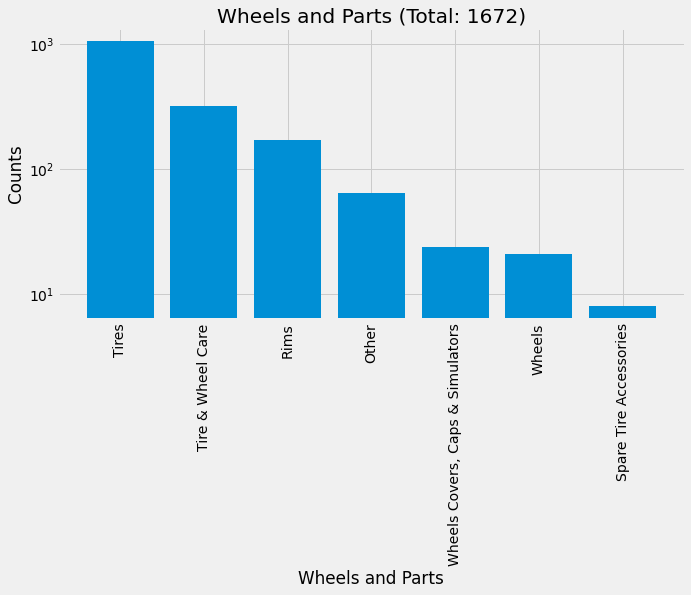

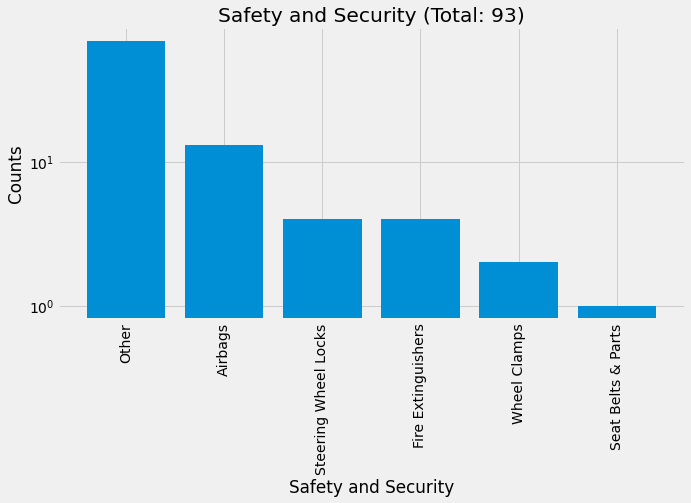

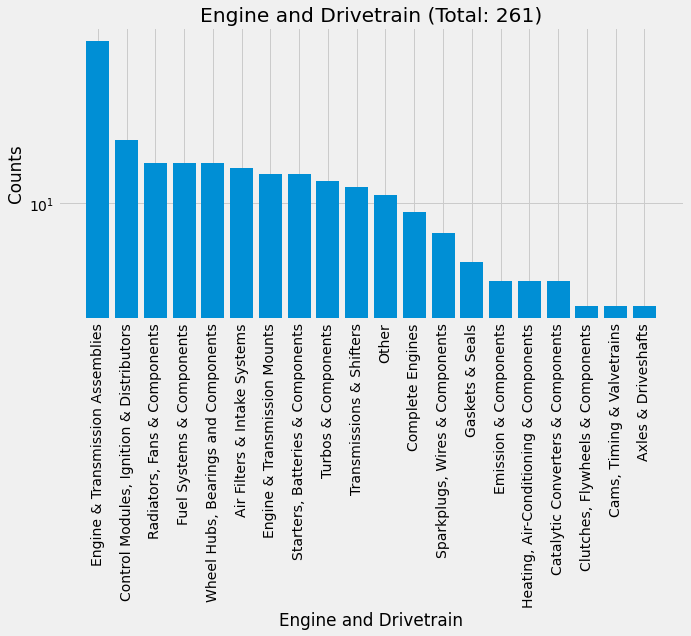

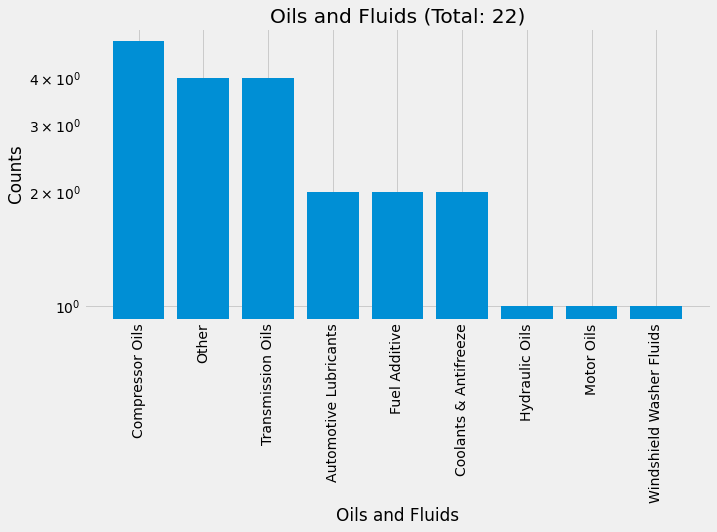

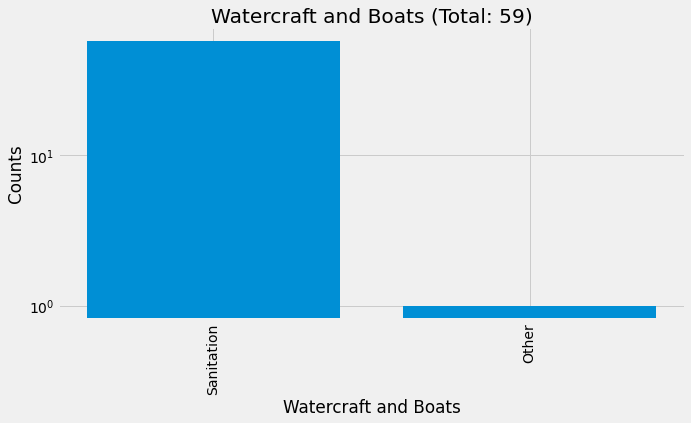

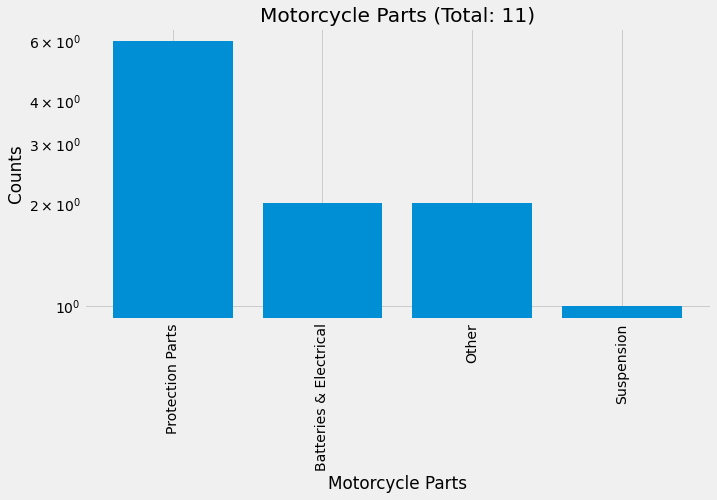

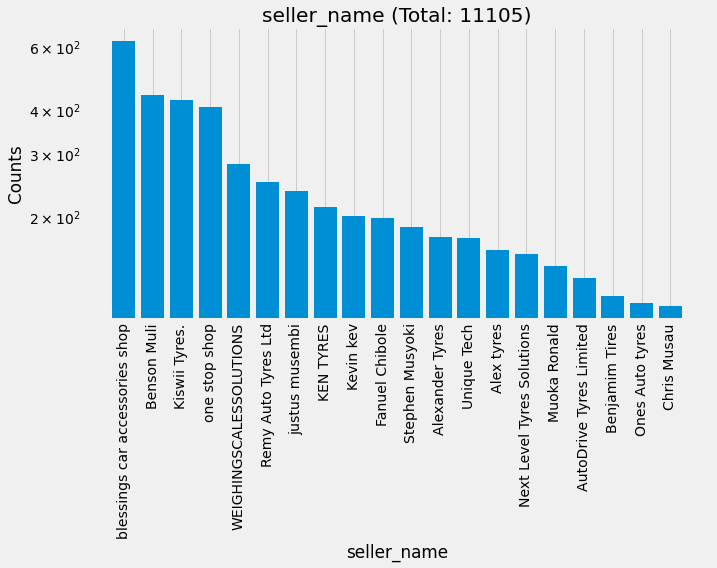

In [136]:
# df.columns
ls_categorical =['region_name', 'Condition','Type', 'Make', 'Subtype','Interior Accessories', 'Exterior Accessories','Headlights and Lighting', 'Audio Parts', 'Wheels and Parts','Safety and Security', 'Engine and Drivetrain', 'Oils and Fluids','Watercraft and Boats', 'Motorcycle Parts','seller_name']
for item in ls_categorical:
    plot_bars(item, True)

In [137]:
# Add info from basic data df

# Further exploration

In [140]:
df.shape

(11105, 47)

In [141]:
df.head()

,count_images,count_views,date_created_x,date_edited,date_moderated,description,id,price_history,region_name,region_text,title,url,Condition,Type,Make,Subtype,Interior Accessories,Exterior Accessories,Headlights and Lighting,Audio Parts,Suptype,Wheels and Parts,Safety and Security,Engine and Drivetrain,Oils and Fluids,Car Care,Watercraft and Boats,Motorcycle Parts,is_closed,advert_id,advert_price,adverts_count,chat_on,date_created_y,feedback_count,seller_id,last_seen,seller_name,seller_phone,status,user_response_time,guid,is_boost,region_parent_name,user_phone,short_description,Price
0,1.0,34,"Thu, 30 Jun 2022 07:38:02 GMT",NaN,"Thu, 30 Jun 2022 07:56:49 GMT",Good quality for use,10502792,False,Nairobi Central,"Nairobi, Nairobi Central",Car Wash Machine on Offer,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10502792,26500,3923,True,10m,0,3696862,5 hours,Tabitha enterprises,NaN,active,Typically replies within a few hours,iOR7sR6b4zs4TyEgbQAFfasQ,diamond,Nairobi,790689845,Good quality for use,26500
1,2.0,138,"Fri, 08 Jul 2022 07:12:58 GMT",NaN,"Fri, 08 Jul 2022 07:53:28 GMT",ABRO radiator coolant red 4 litres,10598516,False,Nairobi Central,"Nairobi, Nairobi Central",Radiator Coolant ABRO Red 4L,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Oils & Fluids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10598516,1000,150,True,1y 2m,2,3463452,3 hours,Genesil Autobrake & Accessories Ltd,NaN,active,Typically replies within a few hours,ilK0bnwLY6LEdvlq5VpAizT0,vip+,Nairobi,722795527,ABRO radiator coolant red 4 litres,1000
2,1.0,20,"Tue, 18 Jan 2022 10:22:08 GMT",NaN,"Tue, 18 Jan 2022 16:26:02 GMT",Air Filter - Audi (4G0-133-843-L),8586019,False,Industrial Area Nairobi,"Nairobi, Industrial Area Nairobi",Air Filter - Audi (4g0-133-843-L),https://jiji.co.ke/viwandani-makadara/car-part...,Brand New,Engine & Drivetrain,Audi,Air Filters & Intake Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8586019,2000,184,True,1y 10m,28,2786121,5 hours,VIPPS AUTO PARTS,NaN,active,Typically replies within a few hours,9Y2tYL7EjD7zyf4PxT7xfoYd,vip,Nairobi,741139980,Air Filter - Audi (4G0-133-843-L),2000
3,1.0,49,"Fri, 14 Jan 2022 14:39:24 GMT","Mon, 13 Jun 2022 06:26:53 GMT","Mon, 13 Jun 2022 06:26:53 GMT",Archive: Imported and genuine ex Japan auto pa...,8544009,False,Ngara,"Nairobi, Ngara",Archive: Stearings for Small Cars.,https://jiji.co.ke/ngara/car-parts-and-accesso...,Used,Other,Other Make,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8544009,6000,3,True,2y 3m,10,2416590,4 hours,AIRBAG WORLD AUTO SPARES,NaN,active,Typically replies within a day,7CK7s2jNdsc7vwJrQpg0WSrq,vip_gold,Nairobi,715118289,Imported and genuine ex Japan auto parts.,6000
4,1.0,29,"Mon, 18 Jul 2022 11:45:17 GMT",NaN,"Mon, 18 Jul 2022 12:11:00 GMT",Archive: Livguard Din100.12v/100ah spill proof...,10691542,False,Nairobi Central,"Nairobi, Nairobi Central",Archive: Livguard Din 100.12/100ah Maintenance...,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Interior Accessories,Other Make,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,10691542,10500,114,True,2y 7m,0,2189462,4 hours,Tere Electronics,NaN,active,Typically replies within a few hours,u9NQUYQ7noTtabPoYI4cgEhj,premium,Nairobi,722884731,Livguard Din100.12v/100ah spill proof sealed m...,10500


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11105 entries, 0 to 11104
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   count_images             11103 non-null  float64
 1   count_views              11105 non-null  int64  
 2   date_created_x           11105 non-null  object 
 3   date_edited              8410 non-null   object 
 4   date_moderated           11105 non-null  object 
 5   description              11105 non-null  object 
 6   id                       11105 non-null  int64  
 7   price_history            11105 non-null  bool   
 8   region_name              11105 non-null  object 
 9   region_text              11105 non-null  object 
 10  title                    11105 non-null  object 
 11  url                      11105 non-null  object 
 12  Condition                10677 non-null  object 
 13  Type                     11071 non-null  object 
 14  Make                  

In [150]:
df.columns

Index(['count_images', 'count_views', 'date_created_x', 'date_edited',
       'date_moderated', 'description', 'id', 'price_history', 'region_name',
       'region_text', 'title', 'url', 'Condition', 'Type', 'Make', 'Subtype',
       'Interior Accessories', 'Exterior Accessories',
       'Headlights and Lighting', 'Audio Parts', 'Suptype', 'Wheels and Parts',
       'Safety and Security', 'Engine and Drivetrain', 'Oils and Fluids',
       'Car Care', 'Watercraft and Boats', 'Motorcycle Parts', 'is_closed',
       'advert_id', 'advert_price', 'adverts_count', 'chat_on',
       'date_created_y', 'feedback_count', 'seller_id', 'last_seen',
       'seller_name', 'seller_phone', 'status', 'user_response_time', 'guid',
       'is_boost', 'region_parent_name', 'user_phone', 'short_description',
       'Price'],
      dtype='object')

In [151]:
ls_data=['count_images', 'count_views','date_created_x','date_created_y', 'date_edited','date_moderated', 'description', 'id', 'price_history', 'region_name','title','Condition', 'Type', 'Make','Subtype','is_closed','advert_price', 'adverts_count','seller_name', 'seller_phone', 'status', 'user_response_time','feedback_count','is_boost','region_parent_name', 'user_phone', 'short_description']

In [152]:
df_data=df[ls_data]

In [153]:
df_data

,count_images,count_views,date_created_x,date_created_y,date_edited,date_moderated,description,id,price_history,region_name,title,Condition,Type,Make,Subtype,is_closed,advert_price,adverts_count,seller_name,seller_phone,status,user_response_time,feedback_count,is_boost,region_parent_name,user_phone,short_description
0,1.0,34,"Thu, 30 Jun 2022 07:38:02 GMT",10m,NaN,"Thu, 30 Jun 2022 07:56:49 GMT",Good quality for use,10502792,False,Nairobi Central,Car Wash Machine on Offer,Brand New,Other,NaN,NaN,False,26500,3923,Tabitha enterprises,NaN,active,Typically replies within a few hours,0,diamond,Nairobi,790689845,Good quality for use
1,2.0,138,"Fri, 08 Jul 2022 07:12:58 GMT",1y 2m,NaN,"Fri, 08 Jul 2022 07:53:28 GMT",ABRO radiator coolant red 4 litres,10598516,False,Nairobi Central,Radiator Coolant ABRO Red 4L,Brand New,Oils & Fluids,NaN,NaN,False,1000,150,Genesil Autobrake & Accessories Ltd,NaN,active,Typically replies within a few hours,2,vip+,Nairobi,722795527,ABRO radiator coolant red 4 litres
2,1.0,20,"Tue, 18 Jan 2022 10:22:08 GMT",1y 10m,NaN,"Tue, 18 Jan 2022 16:26:02 GMT",Air Filter - Audi (4G0-133-843-L),8586019,False,Industrial Area Nairobi,Air Filter - Audi (4g0-133-843-L),Brand New,Engine & Drivetrain,Audi,Air Filters & Intake Systems,False,2000,184,VIPPS AUTO PARTS,NaN,active,Typically replies within a few hours,28,vip,Nairobi,741139980,Air Filter - Audi (4G0-133-843-L)
3,1.0,49,"Fri, 14 Jan 2022 14:39:24 GMT",2y 3m,"Mon, 13 Jun 2022 06:26:53 GMT","Mon, 13 Jun 2022 06:26:53 GMT",Archive: Imported and genuine ex Japan auto pa...,8544009,False,Ngara,Archive: Stearings for Small Cars.,Used,Other,Other Make,Other,True,6000,3,AIRBAG WORLD AUTO SPARES,NaN,active,Typically replies within a day,10,vip_gold,Nairobi,715118289,Imported and genuine ex Japan auto parts.
4,1.0,29,"Mon, 18 Jul 2022 11:45:17 GMT",2y 7m,NaN,"Mon, 18 Jul 2022 12:11:00 GMT",Archive: Livguard Din100.12v/100ah spill proof...,10691542,False,Nairobi Central,Archive: Livguard Din 100.12/100ah Maintenance...,Brand New,Interior Accessories,Other Make,NaN,True,10500,114,Tere Electronics,NaN,active,Typically replies within a few hours,0,premium,Nairobi,722884731,Livguard Din100.12v/100ah spill proof sealed m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11100,2.0,8,"Wed, 03 Mar 2021 06:43:14 GMT",3y 1m,"Thu, 18 Aug 2022 07:46:56 GMT","Sat, 20 Aug 2022 11:25:17 GMT",Subwoofer control \n3rca pre outs\nsteering wh...,5382779,True,Nairobi Central,Sph T20bt Pioneer Tablet Radio,Brand New,Audio Parts,Other Make,NaN,False,38000,2339,Kevin kev,NaN,active,Typically replies within a few hours,63,diamond,Nairobi,791637228,Subwoofer control \n3rca pre outs\nsteering wh...
11101,1.0,6,"Fri, 10 Jun 2022 07:03:10 GMT",3y 1m,"Thu, 11 Aug 2022 09:50:10 GMT","Thu, 11 Aug 2022 09:50:10 GMT","Call,, SMS And What'sup:\nFor Inquiries,, Orde...",10249678,False,Nairobi Central,5pcs BMW Floor Carper Mats,Brand New,Interior Accessories,NaN,NaN,False,2600,4245,blessings car accessories shop,NaN,active,Typically replies within a day,6,enterprise,Nairobi,716360248,"Call,, SMS And What'sup:\nFor Inquiries,, Orde..."
11102,1.0,21,"Sun, 19 Jun 2022 16:08:46 GMT",3y 2m,NaN,"Sun, 19 Jun 2022 18:49:42 GMT",High 3d car floor mats\nhas high quality mater...,10369666,False,Nairobi Central,High 3d Car Floor Mats,Brand New,Interior Accessories,Other Make,NaN,False,4900,729,Caroline Kinyanjui,NaN,active,Typically replies within a few hours,10,vip_gold,Nairobi,723712590,High 3d car floor mats\nhas high quality mater...
11103,1.0,14,"Wed, 15 Jun 2022 13:31:55 GMT",2y 4m,NaN,"Wed, 15 Jun 2022 13:54:33 GMT","Ddpai z40 dual car dash cam 2.4"" lcd 1944p fro...",10318704,False,Nairobi Central,Dual Channel Dashcam Z40,Brand New,Interior Accessories,NaN,NaN,False,14999,1859,SlyCindy Nduta,NaN,active,Typically replies within a day,24,vip+,Nairobi,722147825,"Ddpai z40 dual car dash cam 2.4"" lcd 1944p fro..."


In [157]:
# Process date data - Find how long the listing has been up
df_data['date_created_x'][0]

'Thu, 30 Jun 2022 07:38:02 GMT'

In [194]:
def get_time(date):
    try:
        time1 = date.split(',')[1]        
        weekday = date.split(',')[0]
        time1 = time1.split(' ')[:-1]       
        time1= time1[1:]        
        day=time1[0]        
        month = str(strptime(time1[1],'%b').tm_mon).zfill(2)
        year = time1[2]
        hour = time1[3].split(":")[0] 
        mins = time1[3].split(":")[1] 
        sec = time1[3].split(":")[2] 
        mod_date = str(year)+str(month)+str(day)+str(hour)+str(mins)+str(sec)
        mod_date = pd.to_datetime(mod_date)
        return [weekday, mod_date]
    except:
        print('Failed to convert')
        return[date, date]

In [185]:
d =df_data['date_created_x'][3]
get_time(d)

['Fri', Timestamp('2022-01-14 14:39:24')]

In [179]:
time1 = ['14', 'Jan', '2022', '14:39:24']
month = str(strptime(time1[1],'%b').tm_mon).zfill(2)

In [186]:
df_data['date_created_x']=df_data['date_created_x'].apply(lambda x:get_time(x)[1])

C:\Users\Brian\AppData\Local\Temp\ipykernel_4916\3266422496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['date_created_x']=df_data['date_created_x'].apply(lambda x:get_time(x)[1])


In [238]:
df_data

,count_images,count_views,date_created_x,date_created_y,date_edited,date_moderated,description,id,price_history,region_name,title,Condition,Type,Make,Subtype,is_closed,advert_price,adverts_count,seller_name,seller_phone,status,user_response_time,feedback_count,is_boost,region_parent_name,user_phone,short_description
0,1.0,34,2022-06-30 07:38:02,10m,NaT,2022-06-30 07:56:49,Good quality for use,10502792,False,Nairobi Central,Car Wash Machine on Offer,Brand New,Other,NaN,NaN,False,26500,3923,Tabitha enterprises,NaN,active,Typically replies within a few hours,0,diamond,Nairobi,790689845,Good quality for use
1,2.0,138,2022-07-08 07:12:58,1y 2m,NaT,2022-07-08 07:53:28,ABRO radiator coolant red 4 litres,10598516,False,Nairobi Central,Radiator Coolant ABRO Red 4L,Brand New,Oils & Fluids,NaN,NaN,False,1000,150,Genesil Autobrake & Accessories Ltd,NaN,active,Typically replies within a few hours,2,vip+,Nairobi,722795527,ABRO radiator coolant red 4 litres
2,1.0,20,2022-01-18 10:22:08,1y 10m,NaT,2022-01-18 16:26:02,Air Filter - Audi (4G0-133-843-L),8586019,False,Industrial Area Nairobi,Air Filter - Audi (4g0-133-843-L),Brand New,Engine & Drivetrain,Audi,Air Filters & Intake Systems,False,2000,184,VIPPS AUTO PARTS,NaN,active,Typically replies within a few hours,28,vip,Nairobi,741139980,Air Filter - Audi (4G0-133-843-L)
3,1.0,49,2022-01-14 14:39:24,2y 3m,2022-06-13 06:26:53,2022-06-13 06:26:53,Archive: Imported and genuine ex Japan auto pa...,8544009,False,Ngara,Archive: Stearings for Small Cars.,Used,Other,Other Make,Other,True,6000,3,AIRBAG WORLD AUTO SPARES,NaN,active,Typically replies within a day,10,vip_gold,Nairobi,715118289,Imported and genuine ex Japan auto parts.
4,1.0,29,2022-07-18 11:45:17,2y 7m,NaT,2022-07-18 12:11:00,Archive: Livguard Din100.12v/100ah spill proof...,10691542,False,Nairobi Central,Archive: Livguard Din 100.12/100ah Maintenance...,Brand New,Interior Accessories,Other Make,NaN,True,10500,114,Tere Electronics,NaN,active,Typically replies within a few hours,0,premium,Nairobi,722884731,Livguard Din100.12v/100ah spill proof sealed m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11100,2.0,8,2021-03-03 06:43:14,3y 1m,2022-08-18 07:46:56,2022-08-20 11:25:17,Subwoofer control \n3rca pre outs\nsteering wh...,5382779,True,Nairobi Central,Sph T20bt Pioneer Tablet Radio,Brand New,Audio Parts,Other Make,NaN,False,38000,2339,Kevin kev,NaN,active,Typically replies within a few hours,63,diamond,Nairobi,791637228,Subwoofer control \n3rca pre outs\nsteering wh...
11101,1.0,6,2022-06-10 07:03:10,3y 1m,2022-08-11 09:50:10,2022-08-11 09:50:10,"Call,, SMS And What'sup:\nFor Inquiries,, Orde...",10249678,False,Nairobi Central,5pcs BMW Floor Carper Mats,Brand New,Interior Accessories,NaN,NaN,False,2600,4245,blessings car accessories shop,NaN,active,Typically replies within a day,6,enterprise,Nairobi,716360248,"Call,, SMS And What'sup:\nFor Inquiries,, Orde..."
11102,1.0,21,2022-06-19 16:08:46,3y 2m,NaT,2022-06-19 18:49:42,High 3d car floor mats\nhas high quality mater...,10369666,False,Nairobi Central,High 3d Car Floor Mats,Brand New,Interior Accessories,Other Make,NaN,False,4900,729,Caroline Kinyanjui,NaN,active,Typically replies within a few hours,10,vip_gold,Nairobi,723712590,High 3d car floor mats\nhas high quality mater...
11103,1.0,14,2022-06-15 13:31:55,2y 4m,NaT,2022-06-15 13:54:33,"Ddpai z40 dual car dash cam 2.4"" lcd 1944p fro...",10318704,False,Nairobi Central,Dual Channel Dashcam Z40,Brand New,Interior Accessories,NaN,NaN,False,14999,1859,SlyCindy Nduta,NaN,active,Typically replies within a day,24,vip+,Nairobi,722147825,"Ddpai z40 dual car dash cam 2.4"" lcd 1944p fro..."


In [245]:
# df_data['date_edited']=df_data['date_edited'].apply(lambda x:get_time(x)[1])

In [257]:
def get_months(y):
    lsy =re.split('(\d+)',y.strip())
    dict_time={'y ':52, 'y':52,'m':4, 'w':1}
    num=0
    for x in range (len(lsy)):
        item=lsy[x]
        if item.isnumeric():
            res=int(item)*dict_time[lsy[x+1]]
            num=num+res
    return num 

In [258]:
d=df_data['date_created_y'][0]

In [259]:
get_months(d)

40

In [260]:
df_data['months_active']= df_data['date_created_y'].apply(lambda x:get_months(x))

C:\Users\Brian\AppData\Local\Temp\ipykernel_4916\3006997391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['months_active']= df_data['date_created_y'].apply(lambda x:get_months(x))


In [261]:
df_data[['months_active','date_created_y']]

,months_active,date_created_y
0,40,10m
1,60,1y 2m
2,92,1y 10m
3,116,2y 3m
4,132,2y 7m
...,...,...
11100,160,3y 1m
11101,160,3y 1m
11102,164,3y 2m
11103,120,2y 4m


In [266]:
td =np.datetime64(datetime.today().now())
def get_duration(t):
    try:
        x= np.datetime64(td)-np.datetime64(t)
        days = x.astype('timedelta64[D]')
        days = days/np.timedelta64(1, 'D')
        return days 
    except:
        return 0

In [267]:
df_data['listing_duration']= df_data['date_created_x'].apply(lambda x: get_duration(x) )
df_data.head()

C:\Users\Brian\AppData\Local\Temp\ipykernel_4916\3624965430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['listing_duration']= df_data['date_created_x'].apply(lambda x: get_duration(x) )


,count_images,count_views,date_created_x,date_created_y,date_edited,date_moderated,description,id,price_history,region_name,title,Condition,Type,Make,Subtype,is_closed,advert_price,adverts_count,seller_name,seller_phone,status,user_response_time,feedback_count,is_boost,region_parent_name,user_phone,short_description,months_active,listing_duration
0,1.0,34,2022-06-30 07:38:02,10m,NaT,2022-06-30 07:56:49,Good quality for use,10502792,False,Nairobi Central,Car Wash Machine on Offer,Brand New,Other,NaN,NaN,False,26500,3923,Tabitha enterprises,NaN,active,Typically replies within a few hours,0,diamond,Nairobi,790689845,Good quality for use,40,53.0
1,2.0,138,2022-07-08 07:12:58,1y 2m,NaT,2022-07-08 07:53:28,ABRO radiator coolant red 4 litres,10598516,False,Nairobi Central,Radiator Coolant ABRO Red 4L,Brand New,Oils & Fluids,NaN,NaN,False,1000,150,Genesil Autobrake & Accessories Ltd,NaN,active,Typically replies within a few hours,2,vip+,Nairobi,722795527,ABRO radiator coolant red 4 litres,60,45.0
2,1.0,20,2022-01-18 10:22:08,1y 10m,NaT,2022-01-18 16:26:02,Air Filter - Audi (4G0-133-843-L),8586019,False,Industrial Area Nairobi,Air Filter - Audi (4g0-133-843-L),Brand New,Engine & Drivetrain,Audi,Air Filters & Intake Systems,False,2000,184,VIPPS AUTO PARTS,NaN,active,Typically replies within a few hours,28,vip,Nairobi,741139980,Air Filter - Audi (4G0-133-843-L),92,216.0
3,1.0,49,2022-01-14 14:39:24,2y 3m,2022-06-13 06:26:53,2022-06-13 06:26:53,Archive: Imported and genuine ex Japan auto pa...,8544009,False,Ngara,Archive: Stearings for Small Cars.,Used,Other,Other Make,Other,True,6000,3,AIRBAG WORLD AUTO SPARES,NaN,active,Typically replies within a day,10,vip_gold,Nairobi,715118289,Imported and genuine ex Japan auto parts.,116,220.0
4,1.0,29,2022-07-18 11:45:17,2y 7m,NaT,2022-07-18 12:11:00,Archive: Livguard Din100.12v/100ah spill proof...,10691542,False,Nairobi Central,Archive: Livguard Din 100.12/100ah Maintenance...,Brand New,Interior Accessories,Other Make,NaN,True,10500,114,Tere Electronics,NaN,active,Typically replies within a few hours,0,premium,Nairobi,722884731,Livguard Din100.12v/100ah spill proof sealed m...,132,35.0


In [268]:
df_data.describe()

,count_images,count_views,id,advert_price,adverts_count,seller_phone,feedback_count,user_phone,months_active,listing_duration
count,11103.000000,11105.000000,1.110500e+04,11105.000000,11105.000000,0.0,11105.000000,1.110500e+04,11105.000000,11105.000000
mean,1.540394,36.888519,7.682194e+06,19273.940117,1616.544349,NaN,14.346871,7.075003e+08,127.662044,326.055561
std,1.397350,45.486163,2.798875e+06,33020.918558,2044.466667,NaN,24.149946,1.239696e+08,42.165010,292.377986
min,1.000000,1.000000,1.394410e+05,150.000000,0.000000,NaN,0.000000,1.009612e+08,3.000000,18.000000
25%,1.000000,10.000000,5.829405e+06,3999.000000,208.000000,NaN,1.000000,7.077982e+08,104.000000,85.000000
50%,1.000000,27.000000,8.713317e+06,10000.000000,932.000000,NaN,6.000000,7.205292e+08,140.000000,206.000000
75%,1.000000,47.000000,1.010074e+07,20500.000000,2000.000000,NaN,15.000000,7.407371e+08,160.000000,487.000000
max,22.000000,1334.000000,1.084467e+07,850000.000000,24469.000000,NaN,265.000000,7.994170e+08,164.000000,1225.000000


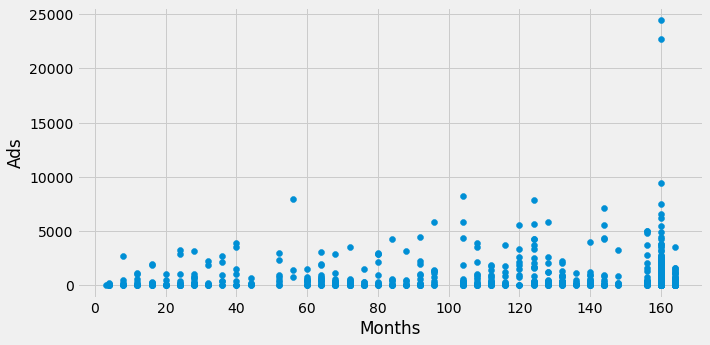

In [275]:
x=df_data1['months_active']
y=df_data1['adverts_count']

plt.xlabel('Months')
plt.ylabel('Ads')

plt.scatter(x,y)
plt.show()

In [277]:
df_data1.shape

(671, 29)

In [ ]:
x